# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
# Get the shape
df_tesla.shape

(124, 3)

In [4]:
# Get the no. of rows
df_tesla.shape[0]

124

In [5]:
# Get the no. of columns
df_tesla.shape[1]

3

In [6]:
# Get the column names
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [7]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [8]:
df_tesla.describe()

TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007

### Unemployment Data

In [9]:
# Get the shape
df_unemployment.shape

(181, 3)

In [10]:
# Get the no. of rows
df_unemployment.shape[0]

181

In [11]:
# Get the no. of columns
df_unemployment.shape[1]

3

In [12]:
# Get the column names
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [13]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [14]:
df_unemployment.describe()

UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000

### Bitcoin

In [15]:
# Get the shape
df_btc_search.shape

(73, 2)

In [16]:
# Get the no. of rows
df_btc_search.shape[0]

73

In [17]:
# Get the no. of columns
df_btc_search.shape[1]

2

In [18]:
# Get the column names
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [19]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [20]:
print(f'Missing values for Tesla?: \n{df_tesla.isna().sum().sort_values(ascending=False)}\n')
print(f'Missing values for U/E?: \n{df_unemployment.isna().sum().sort_values(ascending=False)}\n')
print(f'Missing values for BTC Search?: \n{df_btc_search.isna().sum().sort_values(ascending=False)}\n')

Missing values for Tesla?: 
MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

Missing values for U/E?: 
MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

Missing values for BTC Search?: 
MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64



In [21]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [22]:
print(f'Number of missing values: \n{df_btc_price.isna().sum().sort_values(ascending=False)}')

Number of missing values: 
CLOSE     1
VOLUME    1
DATE      0
dtype: int64


**Challenge**: Remove any missing values that you found. 

In [23]:
df_btc_price.dropna(inplace=True)
print(df_btc_price.isna().values.any())

False


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [24]:
# Get datatypes of df_tesla columns
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [25]:
# Get datatypes of df_btc_price columns
df_btc_price.dtypes

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

In [26]:
# Get datatypes of df_btc_search columns
df_btc_search.dtypes

MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

In [27]:
# Get datatypes of df_unemployment columns
df_unemployment.dtypes

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

In [28]:
# Convert string columns of Month / Date to datetime objects
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [29]:
df_btc_price.head()

DATE       CLOSE      VOLUME
0 2014-09-17  457.334015  21056800.0
1 2014-09-18  424.440002  34483200.0
2 2014-09-19  394.795990  37919700.0
3 2014-09-20  408.903992  36863600.0
4 2014-09-21  398.821014  26580100.0

In [30]:
df_btc_price.dtypes

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [31]:
df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()

/var/folders/30/lb5hh9ks2hn4xmvnr638mxsw0000gn/T/ipykernel_54695/1975229639.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()


In [32]:
df_btc_price_monthly.head()

CLOSE      VOLUME
DATE                              
2014-09-30  386.944000  34707300.0
2014-10-31  338.321014  12545400.0
2014-11-30  378.046997   9194440.0
2014-12-31  320.192993  13942900.0
2015-01-31  217.464005  23348200.0

# Data Visualisation

### Notebook Formatting & Style Helpers

In [33]:
# Create locators for ticks on the time axis
months = mdates.MonthLocator()
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

In [34]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

`Challenge 1:` Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

`Challenge 2:` Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).

How to add tick formatting for dates on the x-axis?

`Challenge 3:` Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

In [35]:
df_tesla.head(2)

MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0 2010-06-01                3           4.766
1 2010-07-01                3           3.988

In [36]:
plt.figure(figsize=(14, 8), dpi=1000)
plt.title('Tesla Stock Price v.s. Search Volume', fontsize=18)
plt.xticks(fontsize=14, rotation=30)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('Tesla stock price', color='#7400b8', fontsize=14)
ax2.set_ylabel('Tesla search trend', color='#ff006e', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax1.set_ylim([0, 35])
ax2.set_ylim([0, 600])
ax1.set_xlim([df_tesla['MONTH'].min(), df_tesla['MONTH'].max()])

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='#7400b8', linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff006e', linewidth=2)
plt.show();

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [37]:
df_btc_price_monthly.head(2)

CLOSE      VOLUME
DATE                              
2014-09-30  386.944000  34707300.0
2014-10-31  338.321014  12545400.0

In [38]:
plt.figure(figsize=(14, 8), dpi=1000)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=30)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC price', color='#212738', fontsize=14)
ax2.set_ylabel('BTC search trend', color='#2ec4b6', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax1.set_ylim([0, 120])
ax2.set_ylim([0, 15000])
ax1.set_xlim([df_btc_price_monthly.index.min(), df_btc_price_monthly.index.max()])

ax1.plot(df_btc_price_monthly.index, df_btc_search['BTC_NEWS_SEARCH'], color='#212738', linewidth=3, linestyle='--')
ax2.plot(df_btc_price_monthly.index, df_btc_price_monthly['CLOSE'], color='#2ec4b6', linewidth=2, linestyle='-.')
plt.show();

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [39]:
df_unemployment.head(2)

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0 2004-01-01                      34     5.7
1 2004-02-01                      33     5.6

In [40]:
plt.figure(figsize=(14, 8), dpi=1000)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=30)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='#3c096c', fontsize=14)
ax2.set_ylabel('Search trend', color='#f08080', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax1.set_ylim([0, 120])
ax2.set_ylim([3, 11])
ax1.set_xlim([df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='#3c096c', linewidth=3, linestyle='-')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='#f08080', linewidth=2, linestyle='-.')
plt.show();

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [41]:
plt.figure(figsize=(14, 8), dpi=1000)
plt.title('Rolling Montly U.S. Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=30)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='#3c096c', fontsize=14)
ax2.set_ylabel('Search trend', color='#f08080', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax1.set_ylim([0, 120])
ax2.set_ylim([3, 11])
ax1.set_xlim([df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max()])

# Get the roll_df
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment['MONTH'], roll_df['UE_BENEFITS_WEB_SEARCH'], color='#3c096c', linewidth=3, linestyle='-')
ax2.plot(df_unemployment['MONTH'], roll_df['UNRATE'], color='#f08080', linewidth=2, linestyle='-.')
plt.show();

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [42]:
df_unemployment_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [43]:
df_unemployment_20.head()

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                       9     5.7
1  2004-02                       8     5.6
2  2004-03                       7     5.8
3  2004-04                       8     5.6
4  2004-05                       6     5.6

In [44]:
df_unemployment_20['MONTH'] = pd.to_datetime(df_unemployment_20['MONTH'])

In [45]:
df_unemployment_20.head(2)

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0 2004-01-01                       9     5.7
1 2004-02-01                       8     5.6

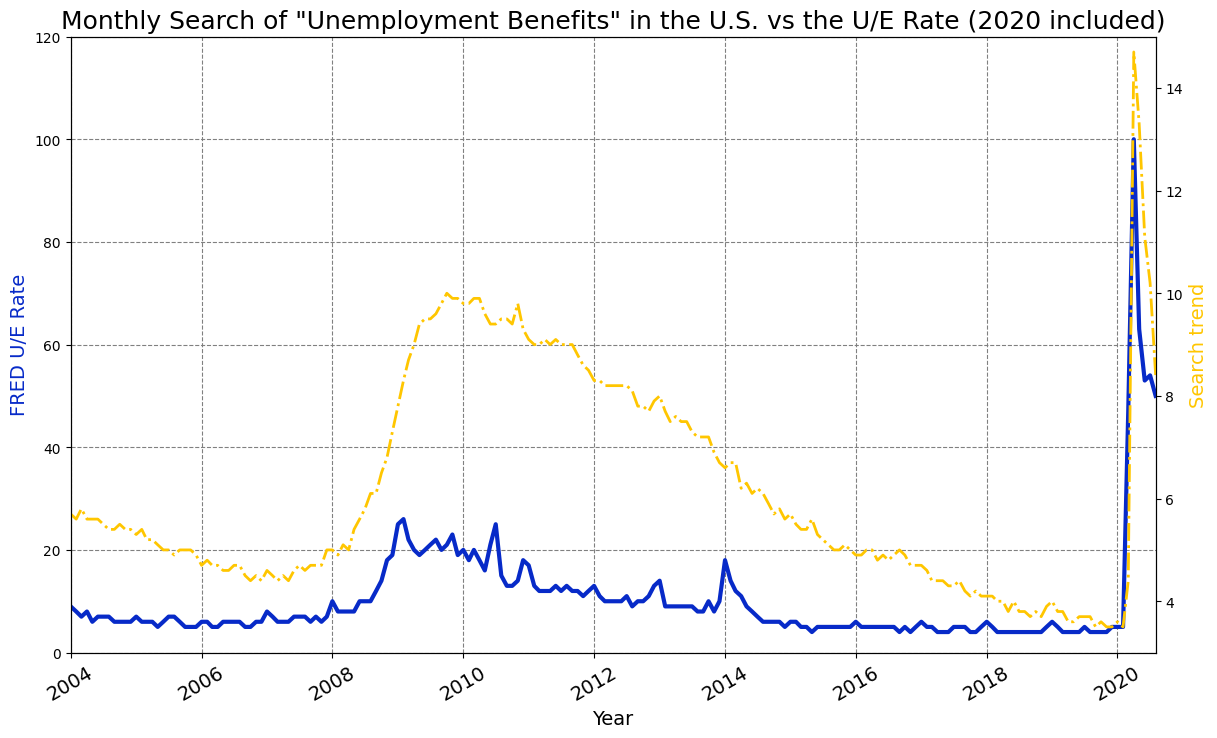

In [46]:
plt.figure(figsize=(14, 8), dpi=100)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate (2020 included)', fontsize=18)
plt.xticks(fontsize=14, rotation=30)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='#072ac8', fontsize=14)
ax2.set_ylabel('Search trend', color='#ffc600', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)

ax1.set_ylim([0, 120])
ax2.set_ylim([3, 15])
ax1.set_xlim([df_unemployment_20['MONTH'].min(), df_unemployment_20['MONTH'].max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment_20['MONTH'], df_unemployment_20['UE_BENEFITS_WEB_SEARCH'], color='#072ac8', linewidth=3, linestyle='-')
ax2.plot(df_unemployment_20['MONTH'], df_unemployment_20['UNRATE'], color='#ffc600', linewidth=2, linestyle='-.')
plt.show();